Este código é um exemplo de sistema baseado na lógica fuzzy para controle automático da velocidade do ventilador de um ar condicionado. O sistema real deve ler a temperatura ambiente para ajustá-la ao que foi pedido pelo usuário. No nosso caso, usamos outra variável para medir, também, a umidade do ar.

In [ ]:
# instalar a biblioteca scikit learn fuzzy
!pip install -U scikit-fuzzy

In [ ]:
# aqui o sistema recebe a leitura de temperatura e umidade do ambiente
temperatura_value = 15
umidade_value = 50

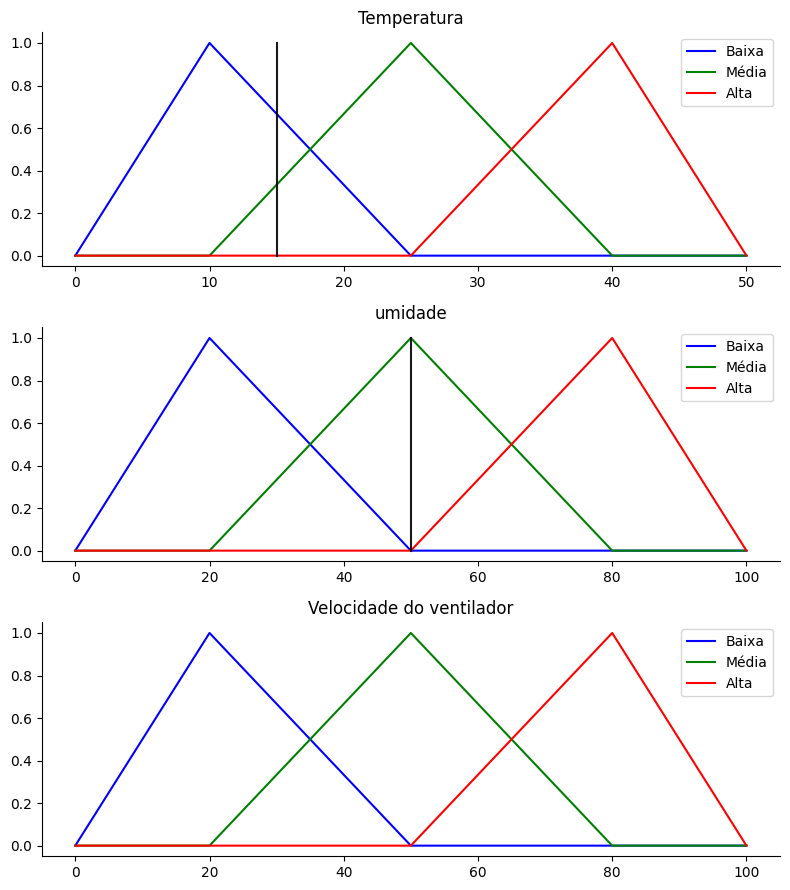

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Define as variáveis e os intervalos de cada uma
#   * Temperatura com intervalo entre [0, 50]
#   * umidade com intervalo entre [0, 100] %
#   * A velocidade do ventilador do ar condicionado entre [0, 100] %
x_temp = np.arange(0, 51, 1)
x_umid = np.arange(0, 101, 1)
x_velocidade = np.arange(0, 101, 1)

# Cria as funções de pertinência
# trampf é um método do skfuzzy que cria uma função trapezoidal (definir 4 valores)
# trimf é um método do skfuzzy que cria uma função triangular(definir 3 valores)
temp_lo = fuzz.trimf(x_temp, [0, 10, 25])
temp_md = fuzz.trimf(x_temp, [10, 25, 40])
temp_hi = fuzz.trimf(x_temp, [25, 40, 50])
umid_lo = fuzz.trimf(x_umid, [0, 20, 50])
umid_md = fuzz.trimf(x_umid, [20, 50, 80])
umid_hi = fuzz.trimf(x_umid, [50, 80, 100])
velocidade_lo = fuzz.trimf(x_velocidade, [0, 20, 50])
velocidade_md = fuzz.trimf(x_velocidade, [20, 50, 80])
velocidade_hi = fuzz.trimf(x_velocidade, [50, 80, 100])

# Aqui vamos gerar os gráficos do universo de pertinência das variáveis
# cria a plotagem para as 2 variáveis de entrada (ax0, ax1) e a variável de saída (ax3)
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))

# cria o gráfico da variável de entrada temperatura
ax0.plot(x_temp, temp_lo, 'b', linewidth=1.5, label='Baixa')
ax0.plot(x_temp, temp_md, 'g', linewidth=1.5, label='Média')
ax0.plot(x_temp, temp_hi, 'r', linewidth=1.5, label='Alta')
# plota a linha do valor (temperatura_value)
ax0.plot([temperatura_value, temperatura_value], [0, 1], 'k', linewidth=1.5, alpha=0.9)
# imprime o nome do gráfico e a legenda
ax0.set_title('Temperatura')
ax0.legend()

# cria o gráfico da variável de entrada umidade
ax1.plot(x_umid, umid_lo, 'b', linewidth=1.5, label='Baixa')
ax1.plot(x_umid, umid_md, 'g', linewidth=1.5, label='Média')
ax1.plot(x_umid, umid_hi, 'r', linewidth=1.5, label='Alta')
#plota a linha do valor (umidade_value)
ax1.plot([umidade_value, umidade_value], [0, 1], 'k', linewidth=1.5, alpha=0.9)
# imprime o nome do gráfico e a legenda
ax1.set_title('umidade')
ax1.legend()

# cria o gráfico da variável de saída velocidade do ventilador
ax2.plot(x_velocidade, velocidade_lo, 'b', linewidth=1.5, label='Baixa')
ax2.plot(x_velocidade, velocidade_md, 'g', linewidth=1.5, label='Média')
ax2.plot(x_velocidade, velocidade_hi, 'r', linewidth=1.5, label='Alta')
# imprime o nome do gráfico e a legenda
ax2.set_title('Velocidade do ventilador')
ax2.legend()

# Aqui é apenas para retirar as linhas superior e direita da caixa dos gráficos
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

# Aqui os gráficos são plotados na tela
plt.tight_layout()

Pertinência da temperatura para o valor dado: 0.6666666666666666 0.3333333333333333 0.0
Pertinência da umidade para o valor dado: 0.0 1.0 0.0
Regra 1:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
Regra 2:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03333333 0.06666667 0.1
 0.13333333 0.16666667 0.2        0.23333333 0.26666667 0.3
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333 0.33333333
 0.33333333 0.33333333 0.333333

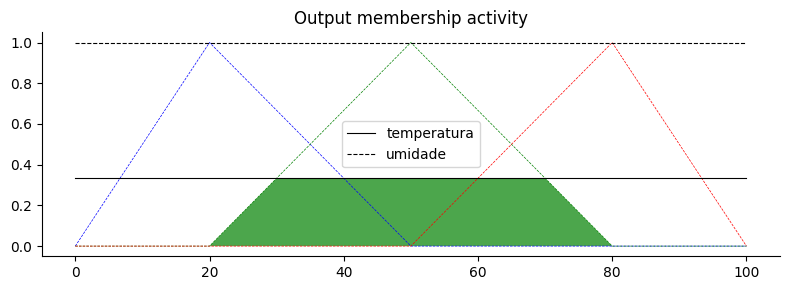

In [ ]:
# O método fuzz.interp_membership calcula os valores da pertinência e coloca numa nova lista
temp_level_lo = fuzz.interp_membership(x_temp, temp_lo, temperatura_value)
temp_level_md = fuzz.interp_membership(x_temp, temp_md, temperatura_value)
temp_level_hi = fuzz.interp_membership(x_temp, temp_hi, temperatura_value)
print("Pertinência da temperatura para o valor dado:",temp_level_lo,temp_level_md,temp_level_hi)

umid_level_lo = fuzz.interp_membership(x_umid, umid_lo, umidade_value)
umid_level_md = fuzz.interp_membership(x_umid, umid_md, umidade_value)
umid_level_hi = fuzz.interp_membership(x_umid, umid_hi, umidade_value)
print("Pertinência da umidade para o valor dado:",umid_level_lo,umid_level_md,umid_level_hi)

#### Criação da regra 1, que usa o conectivo OR (pelo máximo - OU)
# SE temp_level_lo E umid_level_lo, Então velocidade_lo
active_rule1 = np.fmin(temp_level_lo, umid_level_lo)
# Realiza o corte da função de pertinência da saída com base no resultado da regra 1
velocidade_activation_lo = np.fmin(active_rule1, velocidade_lo)

#### Criação da regra 2
# SE temp_level_md E umid_level_md, Então velocidade_md
active_rule2 = np.fmin(temp_level_md, umid_level_md)
velocidade_activation_md = np.fmin(active_rule2, velocidade_md)

#### Criação da regra 3
# SE temp_level_hi OU umid_level_hi, Então velocidade_hi
active_rule3 = np.fmax(temp_level_hi, umid_level_hi)
velocidade_activation_hi = np.fmin(active_rule3, velocidade_hi)

#### Criação da regra 4
# SE temp_level_hi E umid_level_lo, Então velocidade_hi
active_rule4 = np.fmax(temp_level_hi, umid_level_lo)
velocidade_activation_hi = np.fmin(active_rule4, velocidade_hi)

# cria valores zero para plotar o gráfico da saída
velocidade0 = np.zeros_like(x_velocidade)


# Imprime os valores da ativação das regras
print("Regra 1: ",velocidade_activation_lo)
print("Regra 2: ",velocidade_activation_md)
print("Regra 3: ",velocidade_activation_hi)

# Plota a saída
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.fill_between(x_velocidade, velocidade0, velocidade_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_velocidade, velocidade_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_velocidade, velocidade0, velocidade_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_velocidade, velocidade_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_velocidade, velocidade0, velocidade_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_velocidade, velocidade_hi, 'r', linewidth=0.5, linestyle='--')

ax0.plot(x_velocidade, [np.min([j for j in [temp_level_lo,temp_level_md,temp_level_hi] if j != 0]) for i in range(len(x_velocidade))], 'k', linewidth=0.8, label="temperatura")
ax0.plot(x_velocidade, [np.min([j for j in [umid_level_lo,umid_level_md,umid_level_hi] if j != 0]) for i in range(len(x_velocidade))], 'k', linewidth=0.8, linestyle='--', label="umidade")
ax0.set_title('Output membership activity')

ax0.legend()

# Retira as bordas superior e direita do gráfico
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

activation:  0.3333333333333333
velocidade do ventilador: 49.99999999999998


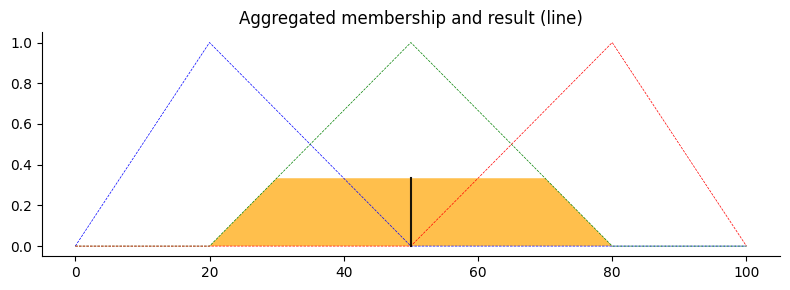

In [ ]:
# Realiza a agregação na saída
aggregated = np.fmax(velocidade_activation_lo,
                     np.fmax(velocidade_activation_md, velocidade_activation_hi))

# Realiza a defuzificação
velocidade = fuzz.defuzz(x_velocidade, aggregated, 'centroid')
velocidade_activation = fuzz.interp_membership(x_velocidade, aggregated, velocidade)  # for plot

# Plota o resultado final
fig, ax0 = plt.subplots(figsize=(8, 3))

ax0.plot(x_velocidade, velocidade_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.plot(x_velocidade, velocidade_md, 'g', linewidth=0.5, linestyle='--')
ax0.plot(x_velocidade, velocidade_hi, 'r', linewidth=0.5, linestyle='--')
ax0.fill_between(x_velocidade, velocidade0, aggregated, facecolor='Orange', alpha=0.7)
ax0.plot([velocidade, velocidade], [0, velocidade_activation], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Aggregated membership and result (line)')

# Retira as bordas superior e direita do gráfico
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
print("activation: ",velocidade_activation)
print("velocidade do ventilador:",velocidade)